In [3]:
from similarity.normalized_levenshtein import NormalizedLevenshtein

normalized_levenshtein = NormalizedLevenshtein()

In [54]:
print(normalized_levenshtein.distance('Fname', 'First Name'))
print(normalized_levenshtein.distance('Last Name', 'First Name'))

0.6
0.3


In [7]:
import pandas as pd

In [11]:
df = pd.read_csv("ames/test.csv")

In [55]:
arr1 = df.columns.values
arr2 = df.columns.values
# maybe convert to all lowercase?
arr1

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

In [34]:
vectors = pd.DataFrame([[normalized_levenshtein.distance(i, j) for j in arr2] for i in arr1])

In [56]:
vectors.head()

,0,1,2,3,4,5,6,7,8,9,...,70,71,72,73,74,75,76,77,78,79
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.909091,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.833333,0.833333,1.000000,0.923077
1,1.0,0.000000,0.800000,0.909091,0.900000,0.900000,0.900000,0.900000,1.000000,0.900000,...,1.000000,0.900000,0.900000,1.000000,0.909091,0.800000,0.700000,0.800000,0.900000,0.923077
2,1.0,0.800000,0.000000,0.727273,1.000000,0.875000,1.000000,1.000000,0.818182,0.888889,...,0.909091,1.000000,0.875000,0.875000,0.909091,0.875000,0.750000,0.875000,1.000000,0.769231
3,1.0,0.909091,0.727273,0.000000,0.545455,0.727273,1.000000,0.545455,0.636364,0.818182,...,1.000000,0.818182,0.818182,0.727273,0.818182,0.909091,0.818182,0.909091,0.909091,0.769231
4,1.0,0.900000,1.000000,0.545455,0.000000,0.714286,0.857143,0.625000,0.818182,0.888889,...,0.909091,0.375000,0.857143,0.857143,0.818182,1.000000,0.857143,1.000000,1.000000,0.923077


In [50]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(vectors)
pc = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [57]:
pc.head()

,principal component 1,principal component 2
0,-0.093302,-0.437746
1,-0.069752,-0.191066
2,0.286697,-0.380828
3,0.423099,-0.221348
4,-0.046492,0.005565


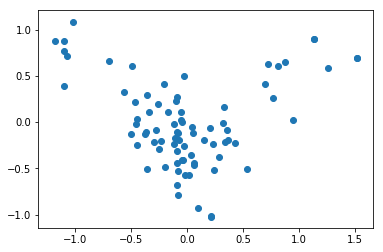

In [52]:
import matplotlib.pyplot as plt
plt.scatter(pc['principal component 1'], pc['principal component 2'])
plt.show()